In [38]:
# 필요한 라이브러리 임포트&설치
# !pip install dbfread
# !pip install haversine
# !pip install sklearn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from haversine import haversine
from tqdm.notebook import tqdm
%matplotlib inline
import platform
import pickle
import re
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format = 'retina'

In [39]:
def pklopen(route):
    with open('{}'.format(route), 'rb') as f:
        df = pickle.load(f)
    return df
def pklsave(df, name):
    with open('{}.pkl'.format(name), 'wb') as f:
        pickle.dump(df, f)

출처:http://kosis.kr/statisticsList/statisticsListIndex.do?menuId=M_01_01&vwcd=MT_ZTITLE&parmTabId=M_01_01#SelectStatsBoxDiv

In [40]:
#멀티인덱스로 잡혀있고, 컬럼지정이 애매해서 전처리해주는 함수 만들었음.
def prep(name):
    df = pd.read_csv(r'./{}'.format(name), encoding = 'cp949')
    df.reset_index(inplace=True)
    df_need = df.rename(columns=df.iloc[0]).drop(df.index[0])
    return df_need

In [41]:
dong = pd.read_excel(r'./서울시_행정동_법정동_20200814.xlsx')

# 여기부턴 깃헙에 올리기에 데이터가 너무 커서 못돌림. 아래로 가서 표시한곳부터 돌릴것.

In [37]:
# df12= prep('101_DT_1B04005N_M_2012.csv')
# df13= prep('101_DT_1B04005N_M_2013.csv')
# df14= prep('101_DT_1B04005N_M_2014.csv')
# df15= prep('101_DT_1B04005N_M_2015.csv')
# df16= prep('101_DT_1B04005N_M_2016.csv')
# df17= prep('101_DT_1B04005N_M_2017.csv')
# df18= prep('101_DT_1B04005N_M_2018.csv')
# df19= prep('101_DT_1B04005N_M_2019.csv')
# df20= prep('101_DT_1B04005N_M_2020.csv')

FileNotFoundError: [Errno 2] No such file or directory: './101_DT_1B04005N_M_2012.csv'

In [5]:
#아래로 이어붙인 데이터 제작
df_total = pd.concat([df12,df13,df14,df15,df16,df17,df18,df19,df20])
df_total

,C행정구역(동읍면)별,행정구역(동읍면)별,C5세별,5세별,시점,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,'00,전국,'0,계,201207,50851082.0000,25460414.0000,25390668.0000
2,'00,전국,'0,계,201208,50871606.0000,25469682.0000,25401924.0000
3,'00,전국,'0,계,201209,50891223.0000,25478622.0000,25412601.0000
4,'00,전국,'0,계,201210,50912264.0000,25488080.0000,25424184.0000
5,'00,전국,'0,계,201211,50930805.0000,25496262.0000,25434543.0000
...,...,...,...,...,...,...,...,...
673086,'5013062000,예래동,'105,100+,202004,4,0,4
673087,'5013062000,예래동,'105,100+,202005,4,0,4
673088,'5013062000,예래동,'105,100+,202006,4,0,4
673089,'5013062000,예래동,'105,100+,202007,4,0,4


In [6]:
#클랜징 후 전처리
# df_total['C행정구역(동읍면)별'] = pd.to_numeric(df_total['C행정구역(동읍면)별'].str.lstrip("'")) #정수로바꾸고싶을떄
df_total['C행정구역(동읍면)별'] = df_total['C행정구역(동읍면)별'].str.lstrip("'").astype(str)
df_total['행정구역(동읍면)별'] = df_total['행정구역(동읍면)별'].str.strip()
df_total['C5세별'] = df_total['C5세별'].str.lstrip("'").astype(int)
df_total['5세별'] = df_total['5세별'].astype(str)
df_total['시점'] = df_total['시점'].astype(int)
df_total['총인구수 (명)'] = df_total['총인구수 (명)'].astype(float)
df_total['남자인구수 (명)'] = df_total['남자인구수 (명)'].astype(float)
df_total['여자인구수 (명)'] = df_total['여자인구수 (명)'].astype(float)
df_total

,C행정구역(동읍면)별,행정구역(동읍면)별,C5세별,5세별,시점,총인구수 (명),남자인구수 (명),여자인구수 (명)
1,00,전국,0,계,201207,50851082.0,25460414.0,25390668.0
2,00,전국,0,계,201208,50871606.0,25469682.0,25401924.0
3,00,전국,0,계,201209,50891223.0,25478622.0,25412601.0
4,00,전국,0,계,201210,50912264.0,25488080.0,25424184.0
5,00,전국,0,계,201211,50930805.0,25496262.0,25434543.0
...,...,...,...,...,...,...,...,...
673086,5013062000,예래동,105,100+,202004,4.0,0.0,4.0
673087,5013062000,예래동,105,100+,202005,4.0,0.0,4.0
673088,5013062000,예래동,105,100+,202006,4.0,0.0,4.0
673089,5013062000,예래동,105,100+,202007,4.0,0.0,4.0


In [7]:
df_total.columns = ['행정동코드','행정동명','연령코드','연령단위','시점','총인구수','남자인구수','여자인구수']
df_total_need = df_total[['시점','행정동코드','행정동명','연령코드','연령단위','총인구수']]
df_total_need

,시점,행정동코드,행정동명,연령코드,연령단위,총인구수
1,201207,00,전국,0,계,50851082.0
2,201208,00,전국,0,계,50871606.0
3,201209,00,전국,0,계,50891223.0
4,201210,00,전국,0,계,50912264.0
5,201211,00,전국,0,계,50930805.0
...,...,...,...,...,...,...
673086,202004,5013062000,예래동,105,100+,4.0
673087,202005,5013062000,예래동,105,100+,4.0
673088,202006,5013062000,예래동,105,100+,4.0
673089,202007,5013062000,예래동,105,100+,4.0


In [144]:
# df_total_need.to_pickle('전국시계열인구.pkl')

In [29]:
# df_total_need = pklopen('전국시계열인구.pkl')

In [35]:
dong = dong[dong['시도명']=='서울특별시']
dong_df = dong[['시군구명','읍면동명','행정동코드']].fillna(0)
gu_code = dong_df[dong_df.읍면동명==0]
gu_code

,시군구명,읍면동명,행정동코드
0,0,0,1100000000
1,종로구,0,1111000000
95,중구,0,1114000000
188,용산구,0,1117000000
227,성동구,0,1120000000
251,광진구,0,1121500000
267,동대문구,0,1123000000
283,중랑구,0,1126000000
300,성북구,0,1129000000
353,강북구,0,1130500000


In [36]:
dong_code = dong_df[dong_df.읍면동명!=0].drop_duplicates()
dong_code

,시군구명,읍면동명,행정동코드
2,종로구,청운효자동,1111051500
12,종로구,사직동,1111053000
24,종로구,삼청동,1111054000
31,종로구,부암동,1111055000
34,종로구,평창동,1111056000
...,...,...,...
763,강동구,성내제2동,1174065000
764,강동구,성내제3동,1174066000
765,강동구,길동,1174068500
766,강동구,둔촌제1동,1174069000


In [37]:
dong_code_dic = {}
for dong, code in zip(dong_code.읍면동명, dong_code.행정동코드):
    dong_code_dic[dong] = code
dong_code_dic

{'청운효자동': 1111051500,
 '사직동': 1111053000,
 '삼청동': 1111054000,
 '부암동': 1111055000,
 '평창동': 1111056000,
 '무악동': 1111057000,
 '교남동': 1111058000,
 '가회동': 1111060000,
 '종로1.2.3.4가동': 1111061500,
 '종로5.6가동': 1111063000,
 '이화동': 1111064000,
 '혜화동': 1111065000,
 '창신제1동': 1111067000,
 '창신제2동': 1111068000,
 '창신제3동': 1111069000,
 '숭인제1동': 1111070000,
 '숭인제2동': 1111071000,
 '소공동': 1114052000,
 '회현동': 1114054000,
 '명동': 1114055000,
 '필동': 1114057000,
 '장충동': 1114058000,
 '광희동': 1114059000,
 '을지로동': 1114060500,
 '신당동': 1114061500,
 '다산동': 1114062500,
 '약수동': 1114063500,
 '청구동': 1114064500,
 '신당제5동': 1114065000,
 '동화동': 1114066500,
 '황학동': 1114067000,
 '중림동': 1114068000,
 '후암동': 1117051000,
 '용산2가동': 1117052000,
 '남영동': 1117053000,
 '청파동': 1117055500,
 '원효로제1동': 1117056000,
 '원효로제2동': 1117057000,
 '효창동': 1117058000,
 '용문동': 1117059000,
 '한강로동': 1117062500,
 '이촌제1동': 1117063000,
 '이촌제2동': 1117064000,
 '이태원제1동': 1117065000,
 '이태원제2동': 1117066000,
 '한남동': 1117068500,
 '서빙고동': 1117069000,
 '보광동': 1117070

In [38]:
dong_code_list = list(dong_code.행정동코드)
dong_code_list

[1111051500,
 1111053000,
 1111054000,
 1111055000,
 1111056000,
 1111057000,
 1111058000,
 1111060000,
 1111061500,
 1111063000,
 1111064000,
 1111065000,
 1111067000,
 1111068000,
 1111069000,
 1111070000,
 1111071000,
 1114052000,
 1114054000,
 1114055000,
 1114057000,
 1114058000,
 1114059000,
 1114060500,
 1114061500,
 1114062500,
 1114063500,
 1114064500,
 1114065000,
 1114066500,
 1114067000,
 1114068000,
 1117051000,
 1117052000,
 1117053000,
 1117055500,
 1117056000,
 1117057000,
 1117058000,
 1117059000,
 1117062500,
 1117063000,
 1117064000,
 1117065000,
 1117066000,
 1117068500,
 1117069000,
 1117070000,
 1120052000,
 1120053500,
 1120054000,
 1120055000,
 1120056000,
 1120057000,
 1120058000,
 1120059000,
 1120061500,
 1120062000,
 1120064500,
 1120065000,
 1120066000,
 1120067000,
 1120069000,
 1120072000,
 1120079000,
 1121571000,
 1121573000,
 1121574000,
 1121575000,
 1121576000,
 1121577000,
 1121578000,
 1121581000,
 1121582000,
 1121583000,
 1121584000,
 1121584700,

In [60]:
for key, value in dong_code_dic.items():
    df_ = df_total_need[df_total_need.행정동코드 == str(value)]
#     pklsave(df_, '{} 연령별인구'.format(key))

    break
df_

,시점,행정동코드,행정동명,연령코드,연령단위,총인구수
397,201207,1111051500,청운효자동,0,계,15216.0
398,201208,1111051500,청운효자동,0,계,15234.0
399,201209,1111051500,청운효자동,0,계,15195.0
400,201210,1111051500,청운효자동,0,계,15175.0
401,201211,1111051500,청운효자동,0,계,15160.0
...,...,...,...,...,...,...
700,202004,1111051500,청운효자동,105,100+,19.0
701,202005,1111051500,청운효자동,105,100+,19.0
702,202006,1111051500,청운효자동,105,100+,19.0
703,202007,1111051500,청운효자동,105,100+,19.0


In [61]:
data_df = df_total_need[df_total_need.행정동코드 == 0]
pd.concat([data_df, df_])

,시점,행정동코드,행정동명,연령코드,연령단위,총인구수
397,201207,1111051500,청운효자동,0,계,15216.0
398,201208,1111051500,청운효자동,0,계,15234.0
399,201209,1111051500,청운효자동,0,계,15195.0
400,201210,1111051500,청운효자동,0,계,15175.0
401,201211,1111051500,청운효자동,0,계,15160.0
...,...,...,...,...,...,...
700,202004,1111051500,청운효자동,105,100+,19.0
701,202005,1111051500,청운효자동,105,100+,19.0
702,202006,1111051500,청운효자동,105,100+,19.0
703,202007,1111051500,청운효자동,105,100+,19.0


In [68]:
data_df = df_total_need[df_total_need.행정동코드 == 0]
for key, value in dong_code_dic.items():
    df_ = df_total_need[df_total_need.행정동코드 == str(value)]
    data_df = pd.concat([data_df, df_])
data_df

,시점,행정동코드,행정동명,연령코드,연령단위,총인구수
397,201207,1111051500,청운효자동,0,계,15216.0
398,201208,1111051500,청운효자동,0,계,15234.0
399,201209,1111051500,청운효자동,0,계,15195.0
400,201210,1111051500,청운효자동,0,계,15175.0
401,201211,1111051500,청운효자동,0,계,15160.0
...,...,...,...,...,...,...
79548,202004,1174070000,둔촌제2동,105,100+,13.0
79549,202005,1174070000,둔촌제2동,105,100+,12.0
79550,202006,1174070000,둔촌제2동,105,100+,12.0
79551,202007,1174070000,둔촌제2동,105,100+,12.0


In [69]:
data_df.to_pickle('연령별인구데이터.pkl')

# 여기부터 돌리기

In [42]:
dong = dong[dong['시도명']=='서울특별시']
dong_df = dong[['시군구명','읍면동명','행정동코드']].fillna(0)
gu_code = dong_df[dong_df.읍면동명==0]
gu_code

,시군구명,읍면동명,행정동코드
0,0,0,1100000000
1,종로구,0,1111000000
95,중구,0,1114000000
188,용산구,0,1117000000
227,성동구,0,1120000000
251,광진구,0,1121500000
267,동대문구,0,1123000000
283,중랑구,0,1126000000
300,성북구,0,1129000000
353,강북구,0,1130500000


In [43]:
dong_code = dong_df[dong_df.읍면동명!=0].drop_duplicates()
dong_code

,시군구명,읍면동명,행정동코드
2,종로구,청운효자동,1111051500
12,종로구,사직동,1111053000
24,종로구,삼청동,1111054000
31,종로구,부암동,1111055000
34,종로구,평창동,1111056000
...,...,...,...
763,강동구,성내제2동,1174065000
764,강동구,성내제3동,1174066000
765,강동구,길동,1174068500
766,강동구,둔촌제1동,1174069000


In [44]:
dong_code_dic = {}
for dong, code in zip(dong_code.읍면동명, dong_code.행정동코드):
    dong_code_dic[dong] = code
dong_code_dic

{'청운효자동': 1111051500,
 '사직동': 1111053000,
 '삼청동': 1111054000,
 '부암동': 1111055000,
 '평창동': 1111056000,
 '무악동': 1111057000,
 '교남동': 1111058000,
 '가회동': 1111060000,
 '종로1.2.3.4가동': 1111061500,
 '종로5.6가동': 1111063000,
 '이화동': 1111064000,
 '혜화동': 1111065000,
 '창신제1동': 1111067000,
 '창신제2동': 1111068000,
 '창신제3동': 1111069000,
 '숭인제1동': 1111070000,
 '숭인제2동': 1111071000,
 '소공동': 1114052000,
 '회현동': 1114054000,
 '명동': 1114055000,
 '필동': 1114057000,
 '장충동': 1114058000,
 '광희동': 1114059000,
 '을지로동': 1114060500,
 '신당동': 1114061500,
 '다산동': 1114062500,
 '약수동': 1114063500,
 '청구동': 1114064500,
 '신당제5동': 1114065000,
 '동화동': 1114066500,
 '황학동': 1114067000,
 '중림동': 1114068000,
 '후암동': 1117051000,
 '용산2가동': 1117052000,
 '남영동': 1117053000,
 '청파동': 1117055500,
 '원효로제1동': 1117056000,
 '원효로제2동': 1117057000,
 '효창동': 1117058000,
 '용문동': 1117059000,
 '한강로동': 1117062500,
 '이촌제1동': 1117063000,
 '이촌제2동': 1117064000,
 '이태원제1동': 1117065000,
 '이태원제2동': 1117066000,
 '한남동': 1117068500,
 '서빙고동': 1117069000,
 '보광동': 1117070

In [45]:
dong_code_list = list(dong_code.행정동코드)
dong_code_list

[1111051500,
 1111053000,
 1111054000,
 1111055000,
 1111056000,
 1111057000,
 1111058000,
 1111060000,
 1111061500,
 1111063000,
 1111064000,
 1111065000,
 1111067000,
 1111068000,
 1111069000,
 1111070000,
 1111071000,
 1114052000,
 1114054000,
 1114055000,
 1114057000,
 1114058000,
 1114059000,
 1114060500,
 1114061500,
 1114062500,
 1114063500,
 1114064500,
 1114065000,
 1114066500,
 1114067000,
 1114068000,
 1117051000,
 1117052000,
 1117053000,
 1117055500,
 1117056000,
 1117057000,
 1117058000,
 1117059000,
 1117062500,
 1117063000,
 1117064000,
 1117065000,
 1117066000,
 1117068500,
 1117069000,
 1117070000,
 1120052000,
 1120053500,
 1120054000,
 1120055000,
 1120056000,
 1120057000,
 1120058000,
 1120059000,
 1120061500,
 1120062000,
 1120064500,
 1120065000,
 1120066000,
 1120067000,
 1120069000,
 1120072000,
 1120079000,
 1121571000,
 1121573000,
 1121574000,
 1121575000,
 1121576000,
 1121577000,
 1121578000,
 1121581000,
 1121582000,
 1121583000,
 1121584000,
 1121584700,

In [46]:
data_df = pklopen('연령별인구데이터.pkl')
data_df

,시점,행정동코드,행정동명,연령코드,연령단위,총인구수
397,201207,1111051500,청운효자동,0,계,15216.0
398,201208,1111051500,청운효자동,0,계,15234.0
399,201209,1111051500,청운효자동,0,계,15195.0
400,201210,1111051500,청운효자동,0,계,15175.0
401,201211,1111051500,청운효자동,0,계,15160.0
...,...,...,...,...,...,...
79548,202004,1174070000,둔촌제2동,105,100+,13.0
79549,202005,1174070000,둔촌제2동,105,100+,12.0
79550,202006,1174070000,둔촌제2동,105,100+,12.0
79551,202007,1174070000,둔촌제2동,105,100+,12.0


# 각 동별로 초등학생 인구수 변화추이를 맞추는 lstm을 돌리고, 결과를 평균내서 보자.

In [47]:
test1 = data_df[data_df.행정동명 == '청운효자동']
test2 = test1[test1.연령코드==5]

In [48]:
test3 = test2.총인구수
test3.shape

(98,)

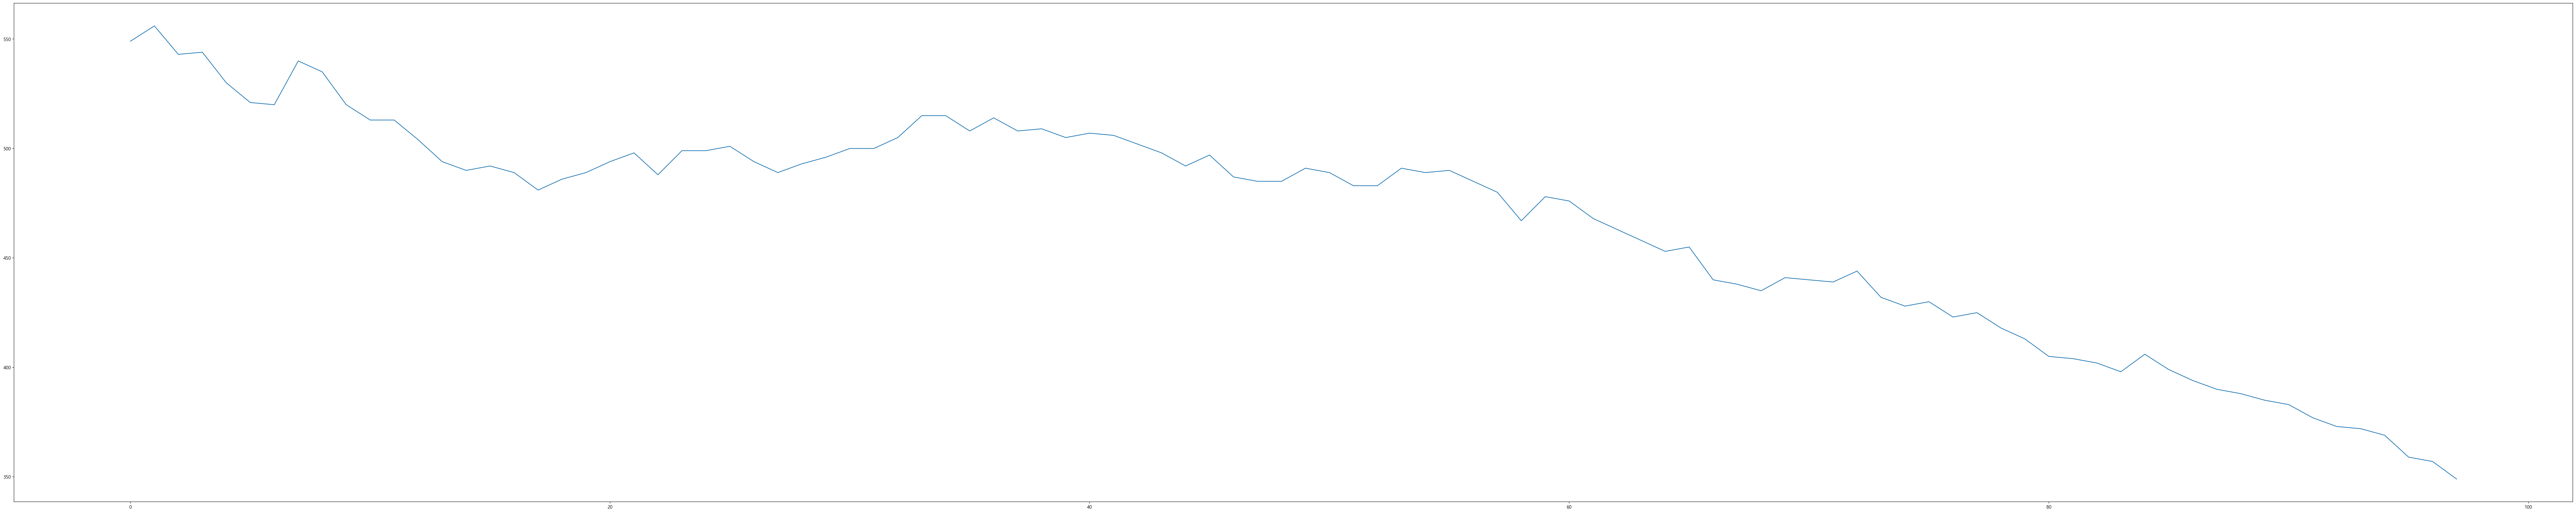

In [49]:
plt.figure(figsize=[100, 20])
plt.plot(np.arange(0, 98), test3)
plt.show()

In [50]:
test3.iloc[1]

556.0

In [51]:
len(test3)

98

In [59]:
X = np.array([[[test3.iloc[i+j]] for j in range(10)] for i in range(len(test3)-9-1)])
y = np.array([[test3.iloc[i+10]] for i in range(len(test3)-10)])
X.shape, y.shape

((88, 10, 1), (88, 1))

In [60]:
import tensorflow as tf
tf.__version__

'2.3.1'

In [61]:
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=False) # shuffle = False로 명시하면, 데이터셋 순차적으로 split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((66, 10, 1), (22, 10, 1), (66, 1), (22, 1))

In [64]:
model = models.Sequential()
model.add(layers.LSTM(10,input_shape = (10,1))) #(10{유닛}+1{인풋}+1{바이어스})*4{LSTM에서 시그모이드나 탄 곱하는 웨이트 4개야}*10{유닛}
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(x_train,y_train,epochs=10,verbose=0)

In [65]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [66]:
y_hat = model.predict(x_test) #테스트 값 예측

In [68]:
for model_weight in model.weights:
    print(model_weight.name, '->', model_weight.shape) #커널은 한 유닛에 웨이트가 4개씩 있으니 들어오는 10개랑 같이 곱해서 40

lstm/lstm_cell/kernel:0 -> (1, 40)
lstm/lstm_cell/recurrent_kernel:0 -> (10, 40)
lstm/lstm_cell/bias:0 -> (40,)
dense/kernel:0 -> (10, 1)
dense/bias:0 -> (1,)


In [70]:
y_hat = model.predict(x_test)

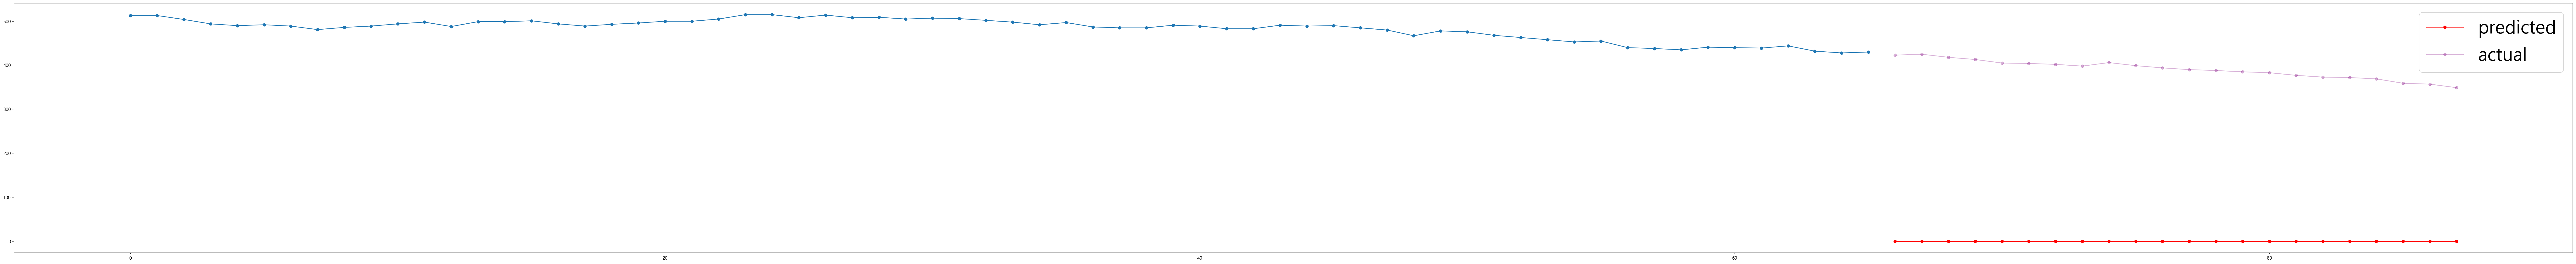

In [72]:
y_axis = np.arange(0, len(y_train))
y_2_axis = np.arange(len(y_train), len(y_train) + len(y_hat))

plt.figure(figsize=(100,10))
plt.plot(y_axis, y_train.reshape(len(x_train),), '-o') #Train데이터 그래프로 표현
plt.plot(y_2_axis, y_hat.reshape(len(x_test),), '-o', color='red', label='predicted') #x_test 예측값 그래프로 표현
plt.plot(y_2_axis, y_test.reshape(len(x_test),), '-o', color='purple', alpha=0.3, label='actual') #y_test 실제값 그래프로 표현 
plt.legend(fontsize=40)
plt.show()

In [73]:
x_train

array([[[549.],
        [556.],
        [543.],
        [544.],
        [530.],
        [521.],
        [520.],
        [540.],
        [535.],
        [520.]],

       [[556.],
        [543.],
        [544.],
        [530.],
        [521.],
        [520.],
        [540.],
        [535.],
        [520.],
        [513.]],

       [[543.],
        [544.],
        [530.],
        [521.],
        [520.],
        [540.],
        [535.],
        [520.],
        [513.],
        [513.]],

       [[544.],
        [530.],
        [521.],
        [520.],
        [540.],
        [535.],
        [520.],
        [513.],
        [513.],
        [504.]],

       [[530.],
        [521.],
        [520.],
        [540.],
        [535.],
        [520.],
        [513.],
        [513.],
        [504.],
        [494.]],

       [[521.],
        [520.],
        [540.],
        [535.],
        [520.],
        [513.],
        [513.],
        [504.],
        [494.],
        [490.]],

       [[520.],
        [540